In [545]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 40)

In [546]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [547]:
data.shape

(7752, 25)

data set contains 7752 dta points and 25 features including 2 target feature

In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


all the variables are float except date variable., and almost all the variables are having missing values as shown below, which will be fixed in feature engineering section

In [549]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [550]:
data.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

Observations:
    1. Solar radiation features standaard deviation is high means dispersion of data is high
    2. LDAPS_RHmax,LDAPS_WS,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar Radiation feaatures are highly skewed, we will fix them in feaature engineering


In [551]:
#Changing the date feature to date format

data['Date']=pd.to_datetime(data['Date'])

In [552]:
data['Date'].dtype

dtype('<M8[ns]')

# EDA_UNIVARIATE ANALYSIS

<AxesSubplot:>

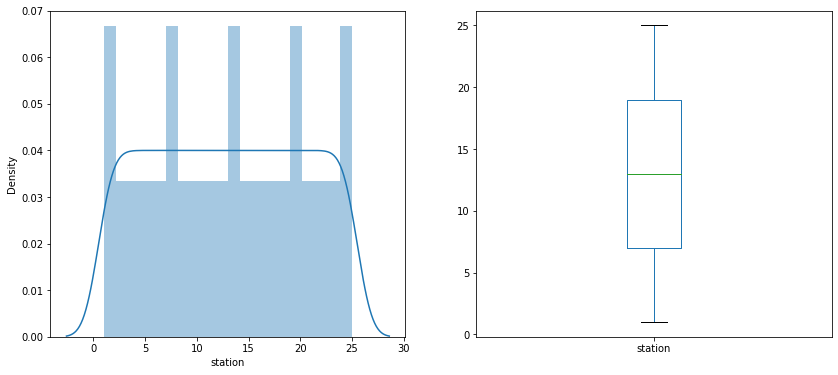

In [553]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['station'])
plt.subplot(1,2,2)
data['station'].plot.box()

station feature is normally distributed and there are no outliers

<AxesSubplot:>

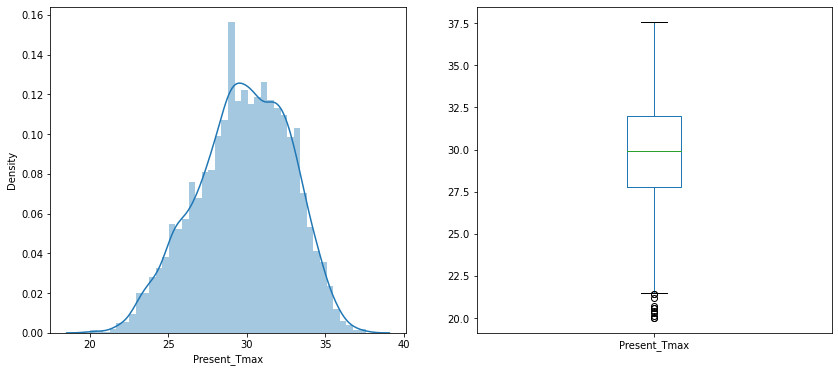

In [554]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Present_Tmax'])
plt.subplot(1,2,2)
data['Present_Tmax'].plot.box()

Present_Tmax feature is not skewed much, skewed at acceptble range and there are outliers

<AxesSubplot:>

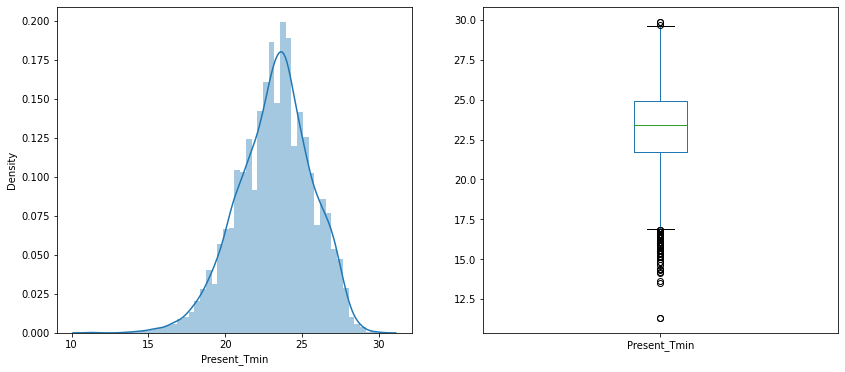

In [555]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Present_Tmin'])
plt.subplot(1,2,2)
data['Present_Tmin'].plot.box()

Present_Tmin feature is not skewed much, skewed at acceptble range and there are outliers

<AxesSubplot:>

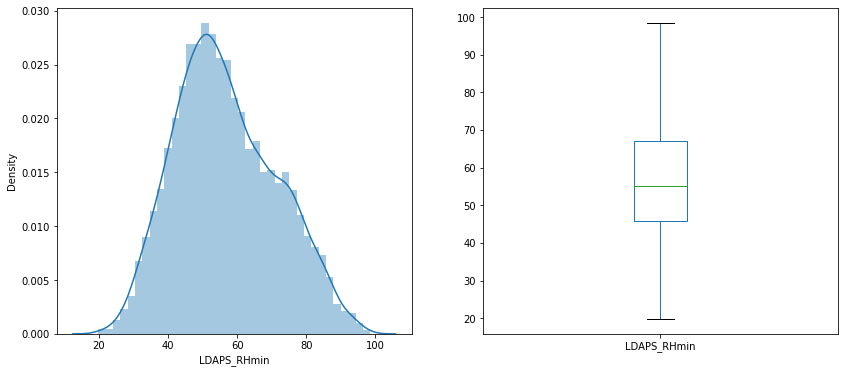

In [556]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_RHmin'])
plt.subplot(1,2,2)
data['LDAPS_RHmin'].plot.box()

LDAPS_RHmin feature is not skewed much, skewed at acceptble range and there are no outliers

<AxesSubplot:>

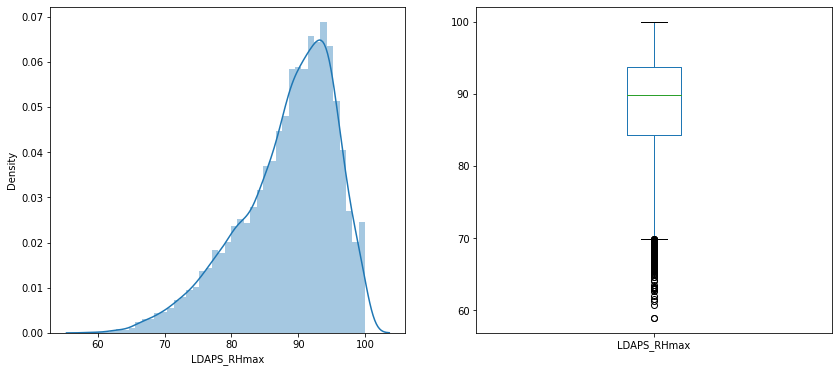

In [557]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_RHmax'])
plt.subplot(1,2,2)
data['LDAPS_RHmax'].plot.box()

LDAPS_RHmax feature is skeed to the left and there are ouliers

<AxesSubplot:>

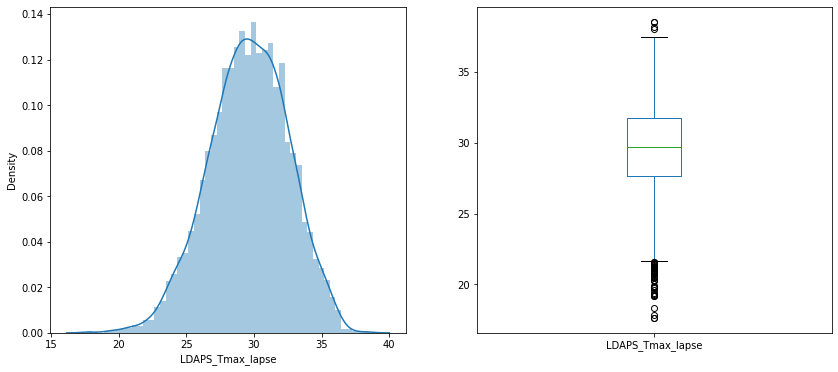

In [558]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_Tmax_lapse'])
plt.subplot(1,2,2)
data['LDAPS_Tmax_lapse'].plot.box()

LDAPS_Tmax_lapse feature is not skewed much, skewed at acceptble range and there are outliers

<AxesSubplot:>

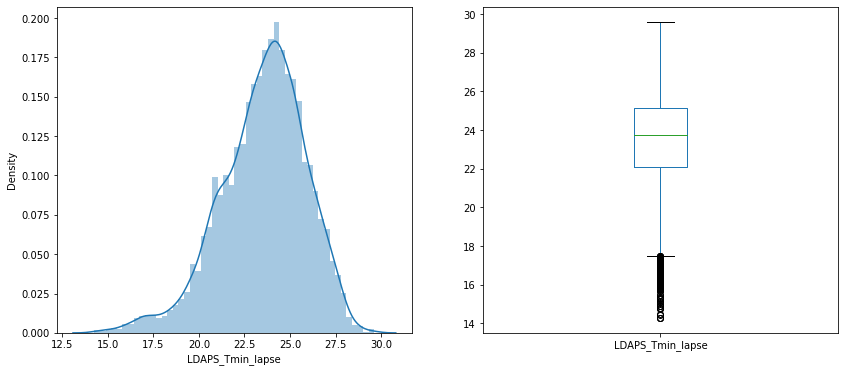

In [559]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_Tmin_lapse'])
plt.subplot(1,2,2)
data['LDAPS_Tmin_lapse'].plot.box()

LDAPS_Tmin_lapse feature skewwed to the left and there are outliers

<AxesSubplot:>

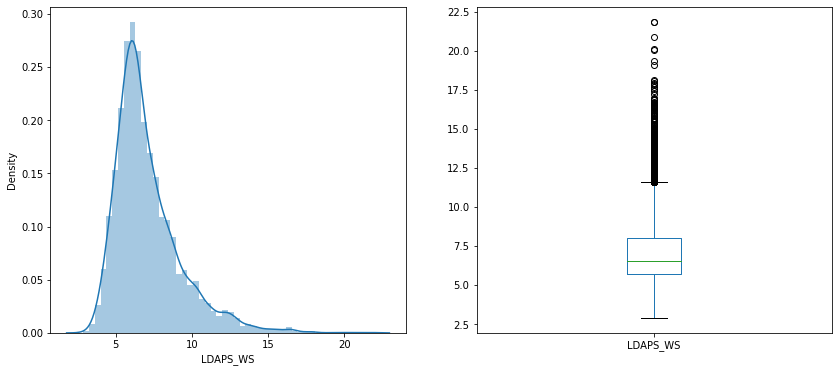

In [560]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_WS'])
plt.subplot(1,2,2)
data['LDAPS_WS'].plot.box()

LDAPS_WS feature skewwed to the left and there are outliers

<AxesSubplot:>

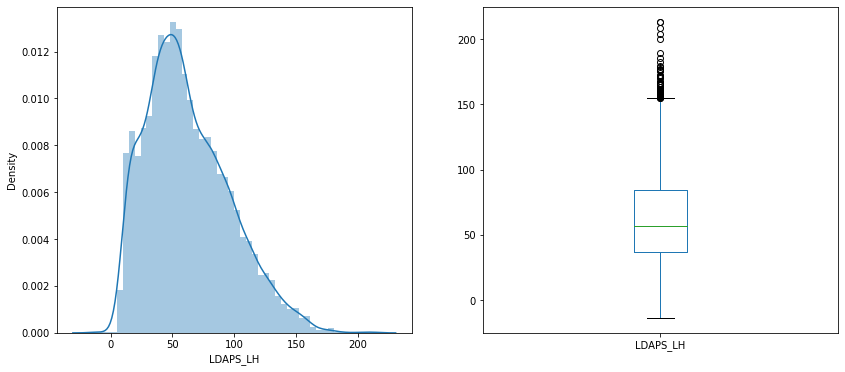

In [561]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_LH'])
plt.subplot(1,2,2)
data['LDAPS_LH'].plot.box()

LDAPS_LH feature skewwed to the right and there are outliers

<AxesSubplot:>

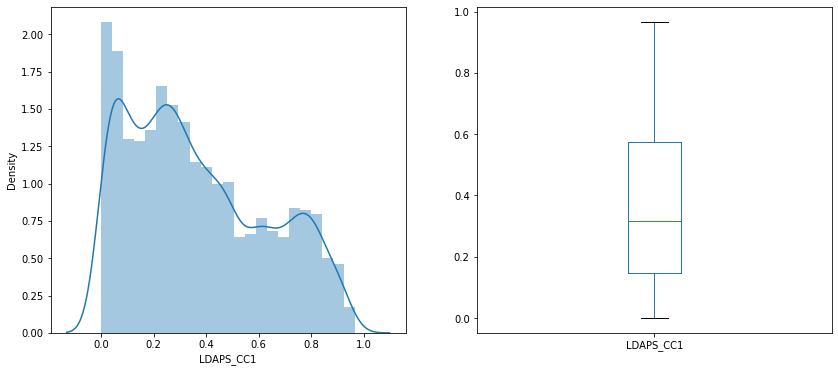

In [562]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_CC1'])
plt.subplot(1,2,2)
data['LDAPS_CC1'].plot.box()

LDAPS_CC1 feature skewwed to the right and there are no outliers

<AxesSubplot:>

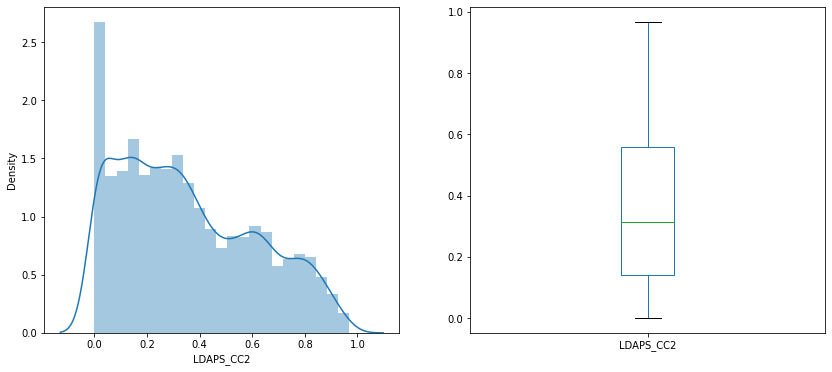

In [563]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_CC2'])
plt.subplot(1,2,2)
data['LDAPS_CC2'].plot.box()

LDAPS_CC2 feature skewed to the right and there are no outliers

<AxesSubplot:>

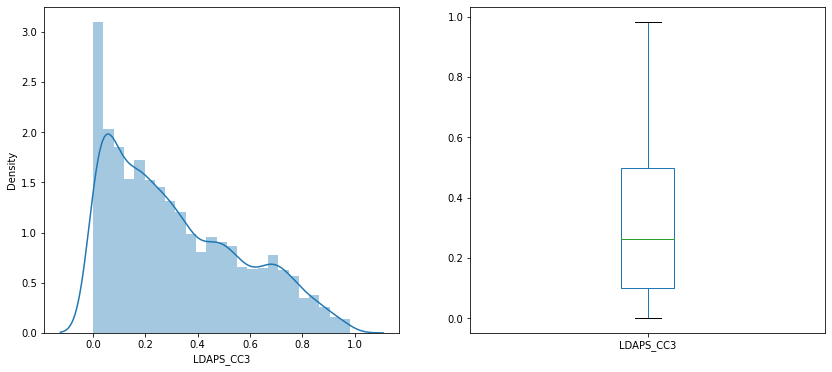

In [564]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_CC3'])
plt.subplot(1,2,2)
data['LDAPS_CC3'].plot.box()

LDAPS_CC3 feature skewed to the right and there are no outliers

<AxesSubplot:>

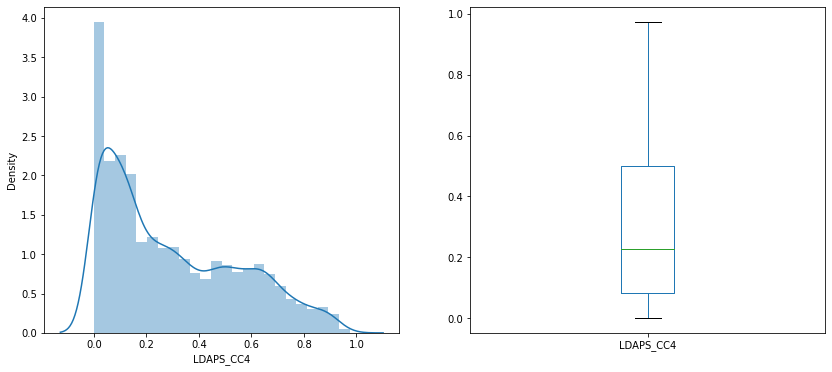

In [565]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_CC4'])
plt.subplot(1,2,2)
data['LDAPS_CC4'].plot.box()

LDAPS_CC4 feature skewed to the right and there are no outliers

<AxesSubplot:>

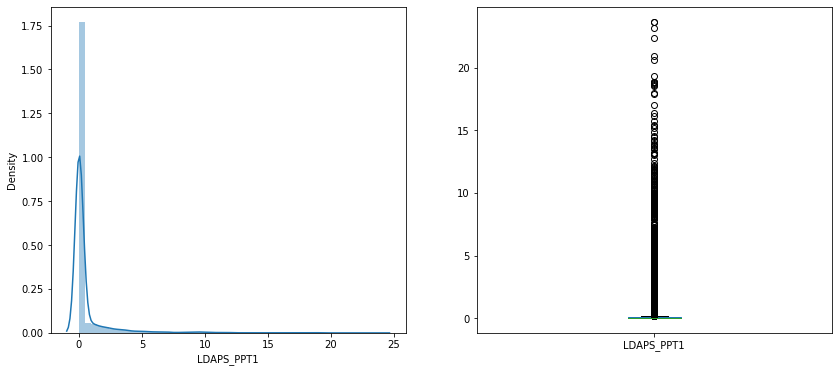

In [566]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_PPT1'])
plt.subplot(1,2,2)
data['LDAPS_PPT1'].plot.box()

LDAPS_PPT1 feature skewed to the right and there are outliers

<AxesSubplot:>

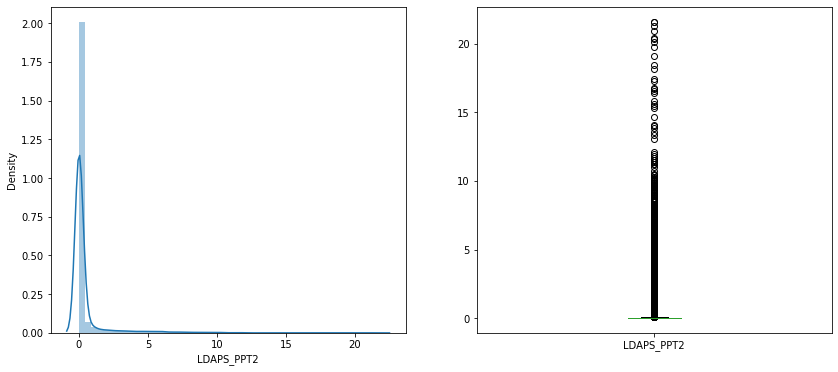

In [567]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_PPT2'])
plt.subplot(1,2,2)
data['LDAPS_PPT2'].plot.box()

LDAPS_PPT2 feature skewed to the right and there are outliers

<AxesSubplot:>

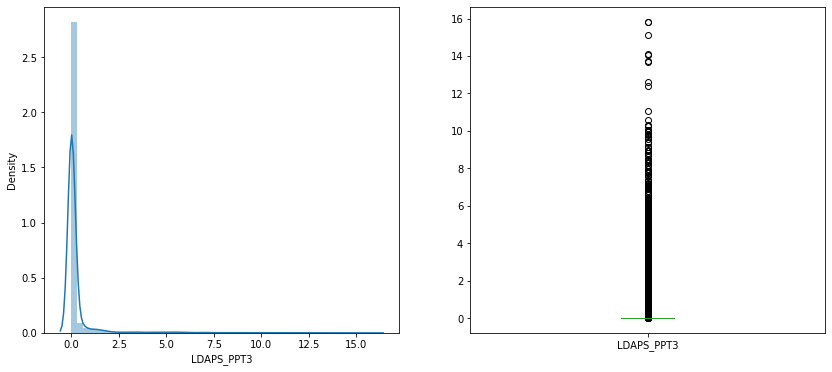

In [568]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_PPT3'])
plt.subplot(1,2,2)
data['LDAPS_PPT3'].plot.box()

LDAPS_PPT3 feature skewed to the right and there are outliers

<AxesSubplot:>

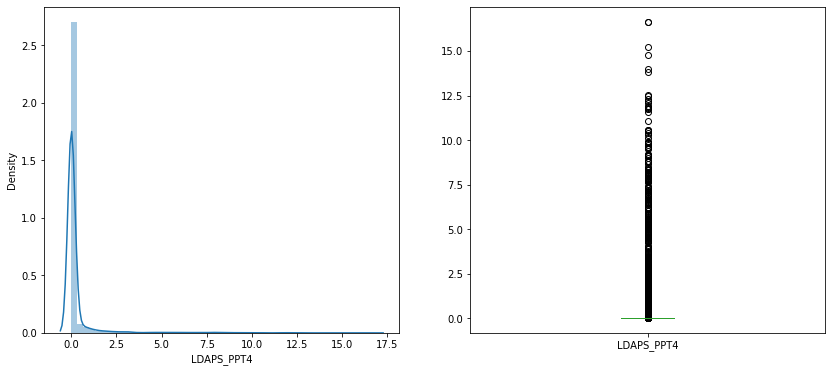

In [569]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_PPT4'])
plt.subplot(1,2,2)
data['LDAPS_PPT4'].plot.box()

LDAPS_PPT4 feature skewed to the right and there are outliers

<AxesSubplot:>

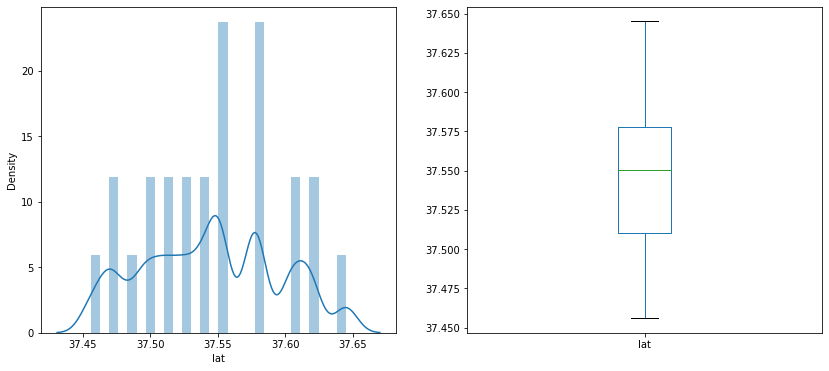

In [570]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['lat'])
plt.subplot(1,2,2)
data['lat'].plot.box()

lat feature is not skewed and there are no outliers

<AxesSubplot:>

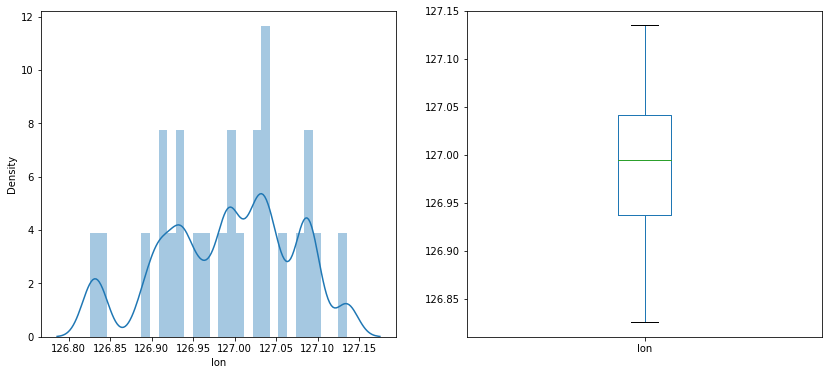

In [571]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['lon'])
plt.subplot(1,2,2)
data['lon'].plot.box()

lon feature is not skewed and there are no outliers

<AxesSubplot:>

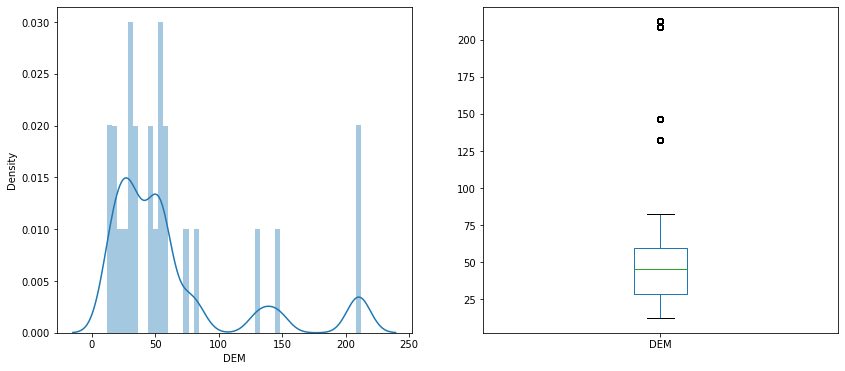

In [572]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['DEM'])
plt.subplot(1,2,2)
data['DEM'].plot.box()

DEM feature is highly skewed and there are outliers

<AxesSubplot:>

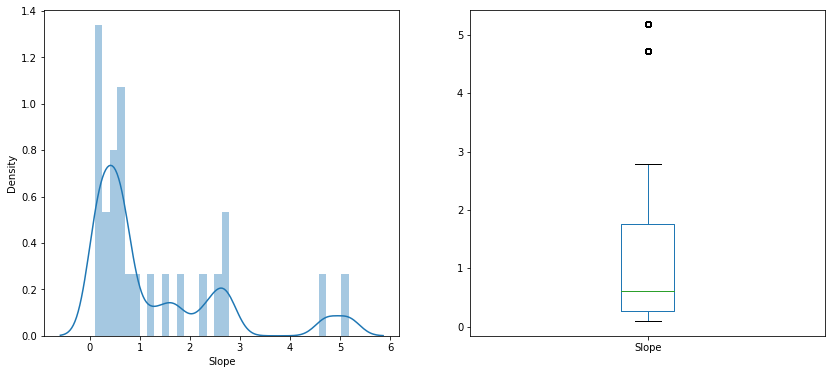

In [573]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Slope'])
plt.subplot(1,2,2)
data['Slope'].plot.box()

slope feature is highly skewed and there are outliers

<AxesSubplot:>

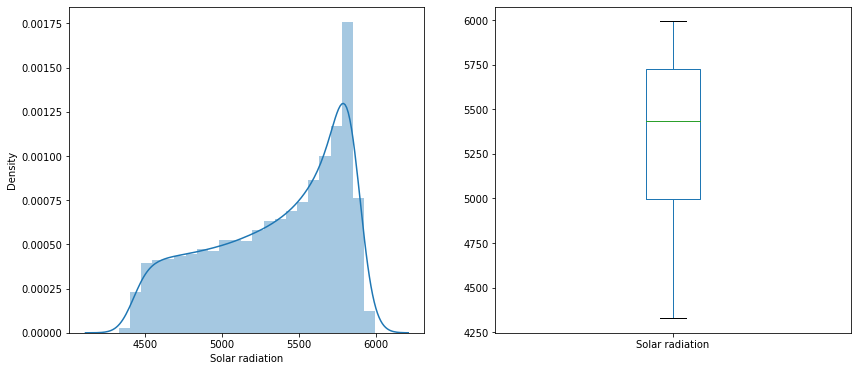

In [574]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Solar radiation'])
plt.subplot(1,2,2)
data['Solar radiation'].plot.box()

Solar radiation feaature is skewed to the left and there are no outliers

In [575]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:>

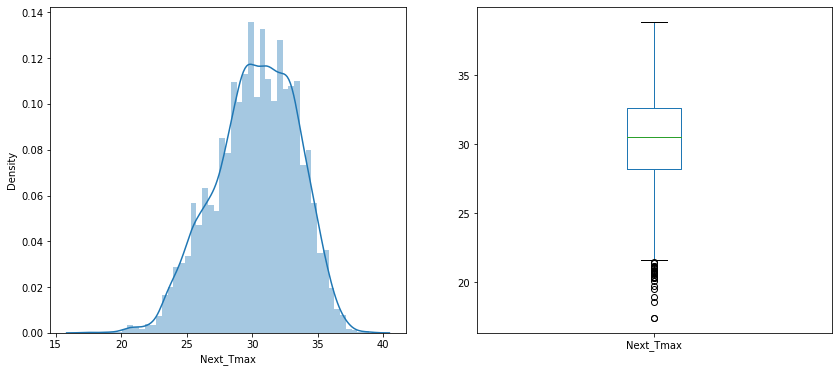

In [576]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Next_Tmax'])
plt.subplot(1,2,2)
data['Next_Tmax'].plot.box()

Next_Tmax is not skewed and there re outliers

<AxesSubplot:>

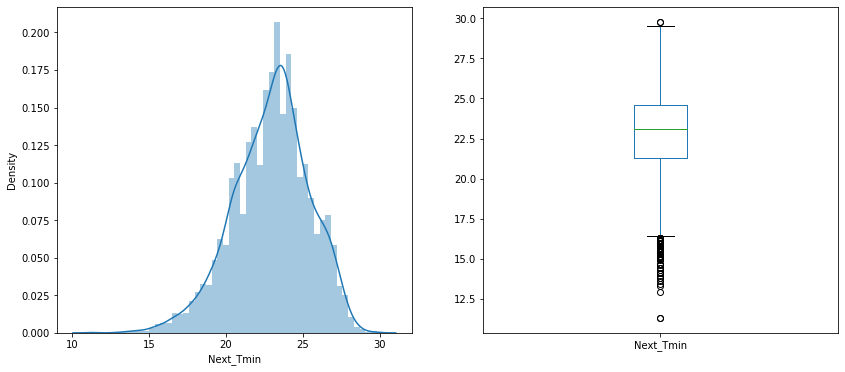

In [577]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Next_Tmin'])
plt.subplot(1,2,2)
data['Next_Tmin'].plot.box()

Next_Tmin is skewwed a little but at acceptable range and theree are outliers

# EDA_BIVARIATE ANALYSIS

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

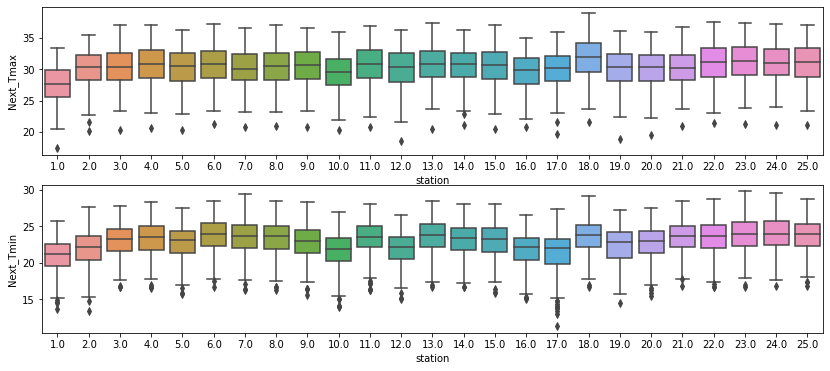

In [578]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

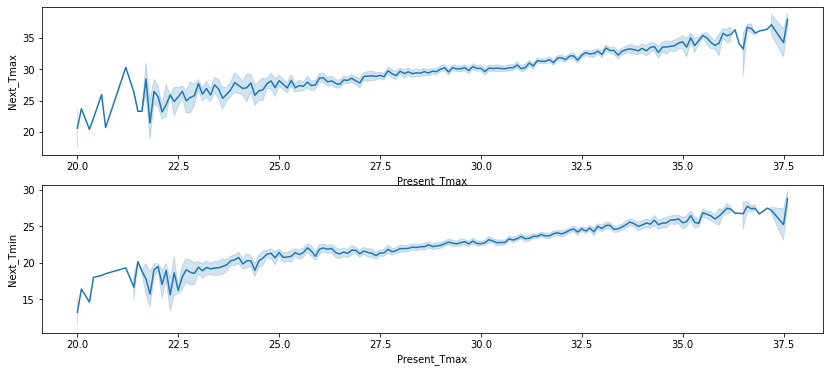

In [579]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.lineplot(x='Present_Tmax',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.lineplot(x='Present_Tmax',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

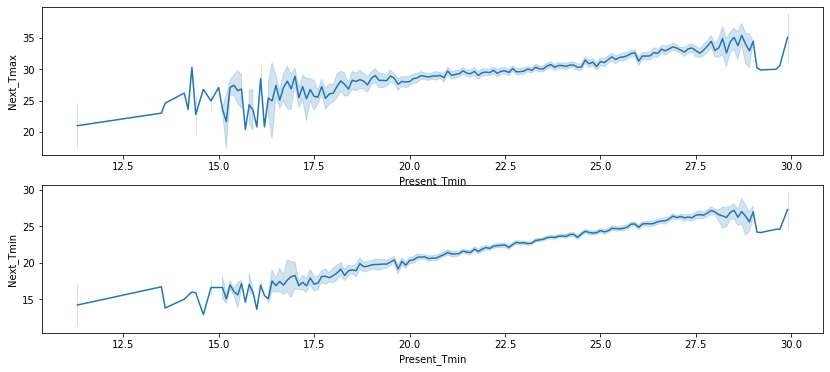

In [580]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.lineplot(x='Present_Tmin',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.lineplot(x='Present_Tmin',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

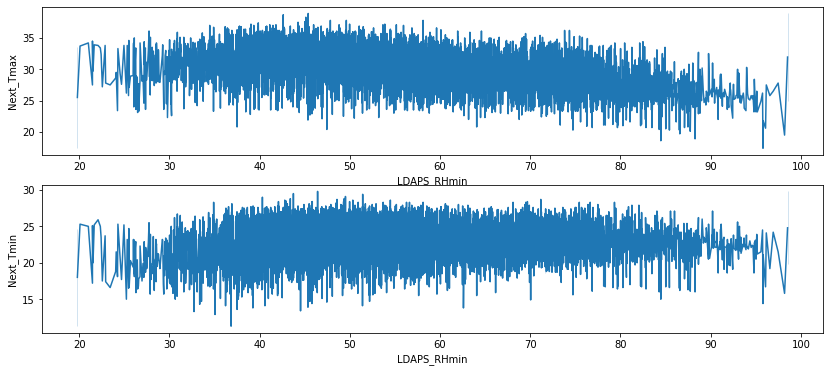

In [581]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.lineplot(x='LDAPS_RHmin',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.lineplot(x='LDAPS_RHmin',y='Next_Tmin',data=data)

In [582]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmin'>

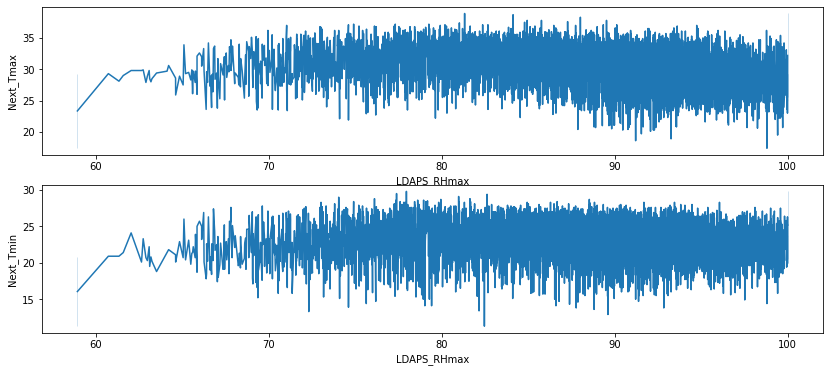

In [583]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.lineplot(x='LDAPS_RHmax',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.lineplot(x='LDAPS_RHmax',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

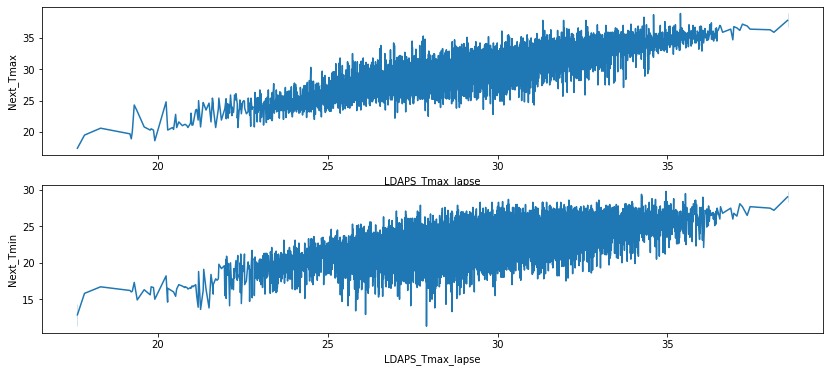

In [584]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.lineplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.lineplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

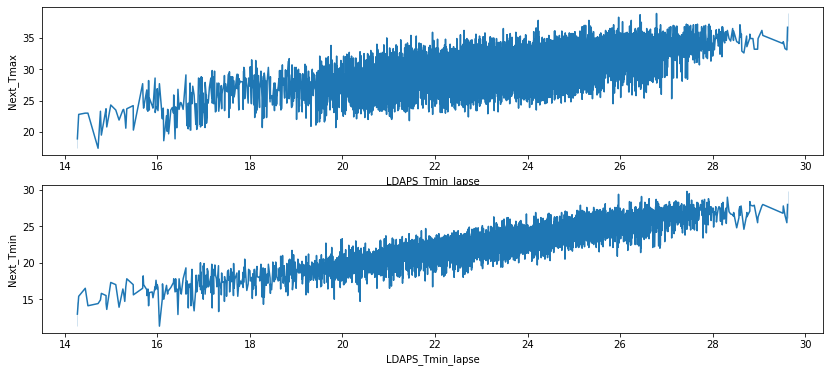

In [585]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.lineplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.lineplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

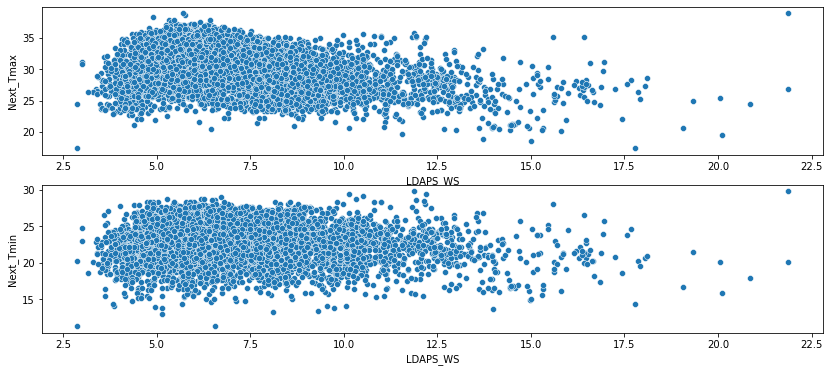

In [586]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_WS',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_WS',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

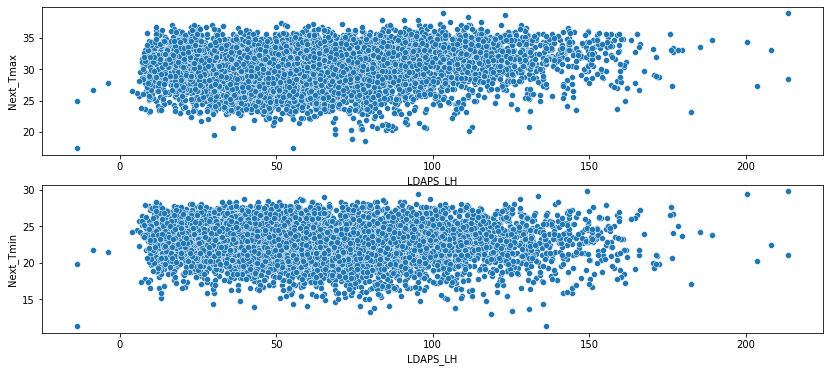

In [587]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_LH',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_LH',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

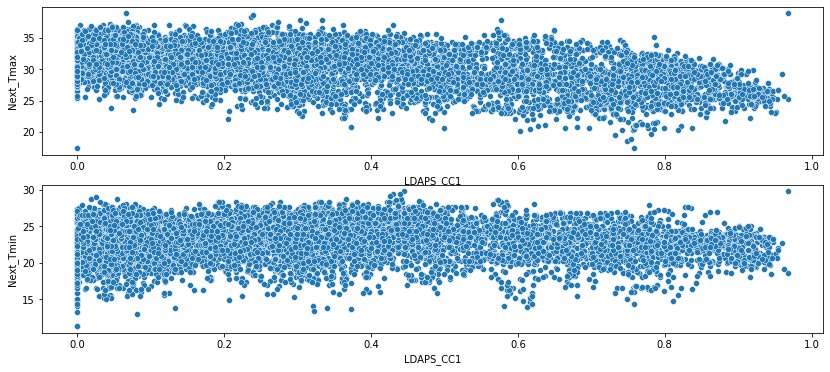

In [588]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

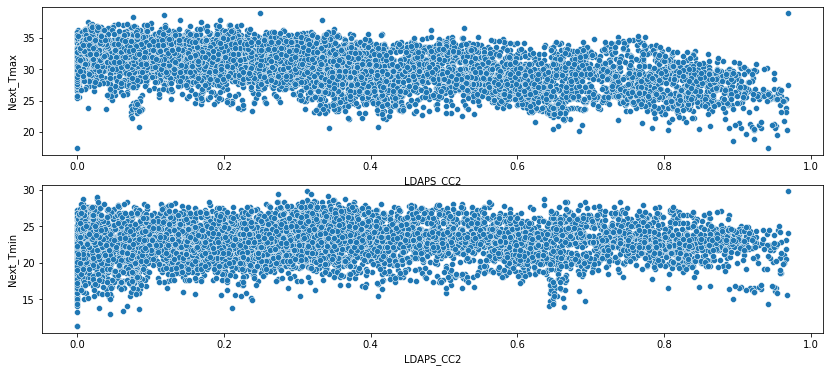

In [589]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmin'>

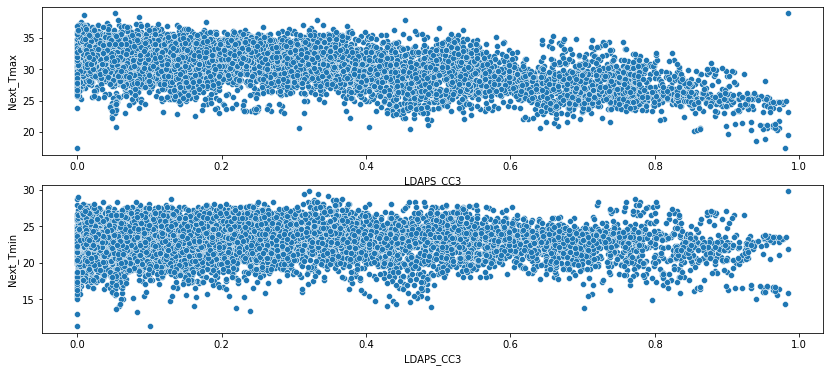

In [590]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

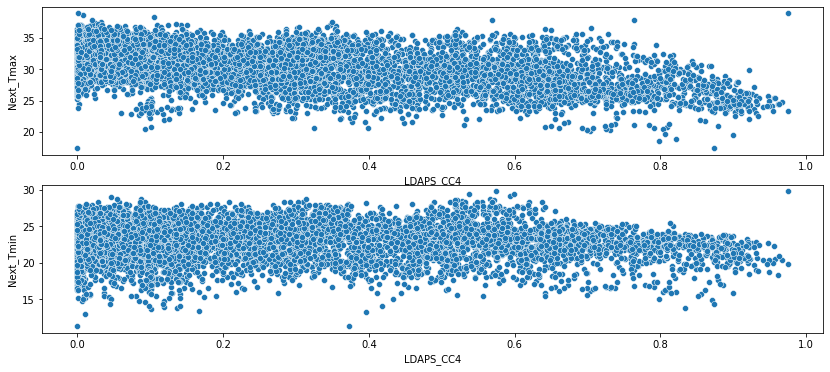

In [591]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmin'>

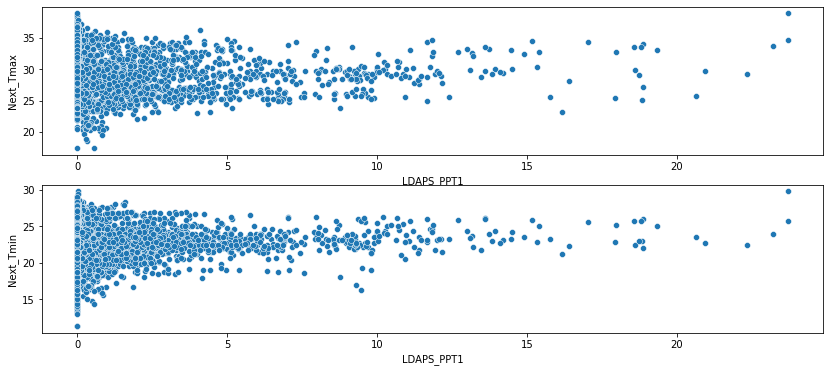

In [592]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_PPT1',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_PPT1',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

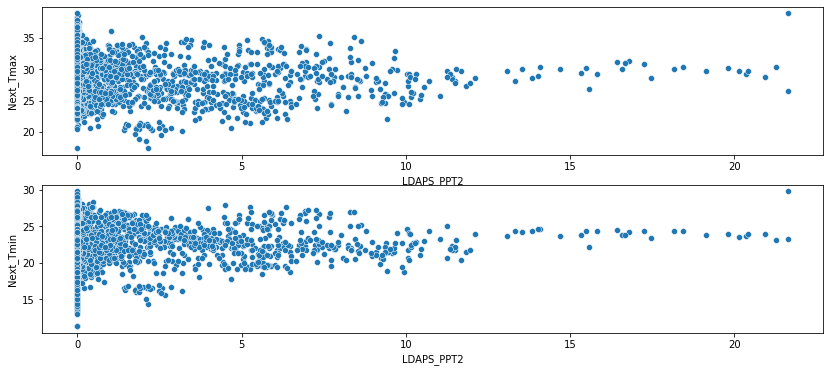

In [593]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmin'>

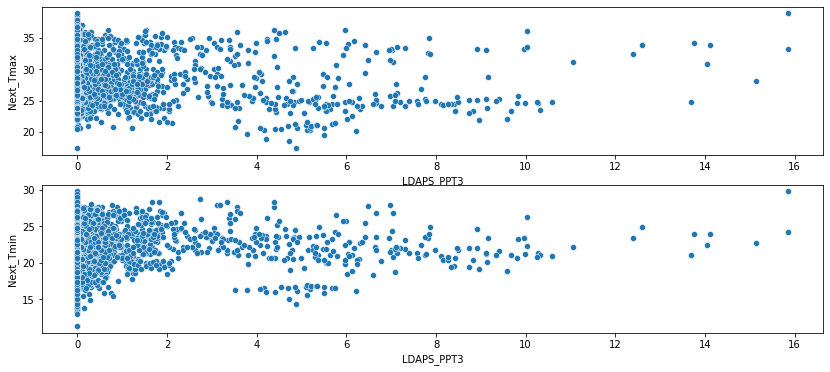

In [594]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_PPT3',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_PPT3',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

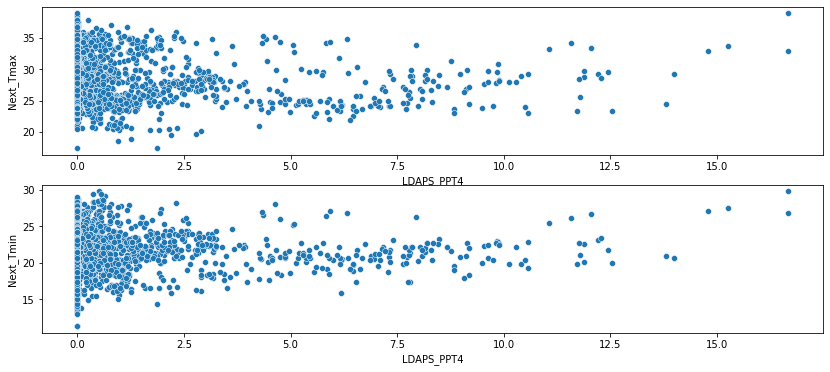

In [595]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmin',data=data)

In [596]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

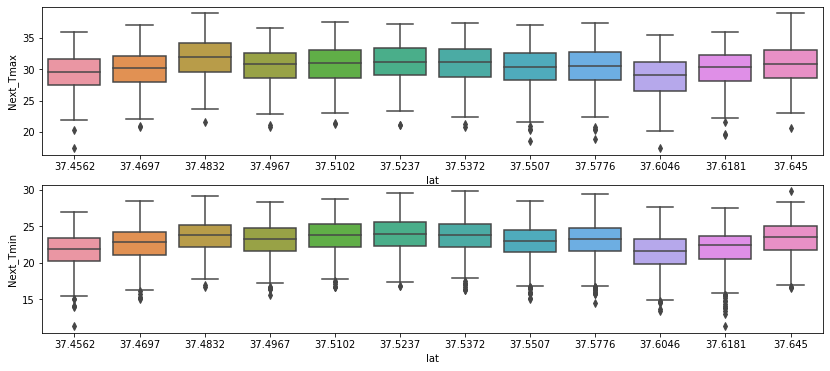

In [597]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

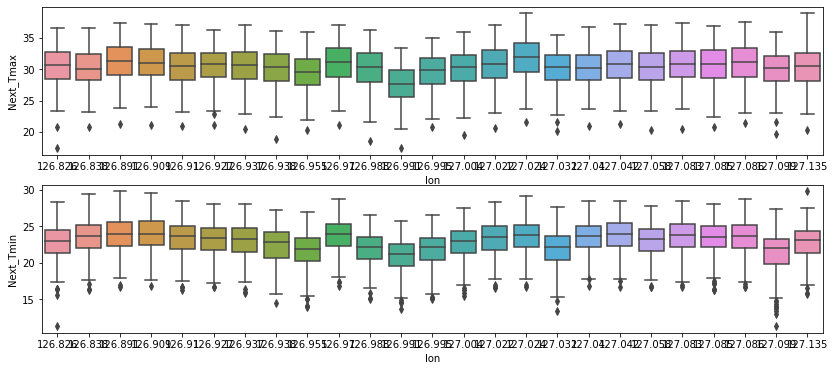

In [598]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmin'>

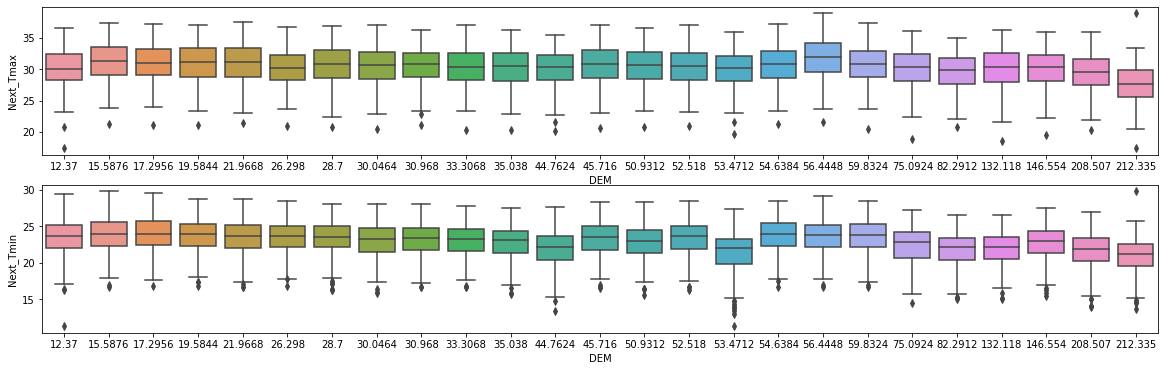

In [599]:
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.boxplot(x='DEM',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.boxplot(x='DEM',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmin'>

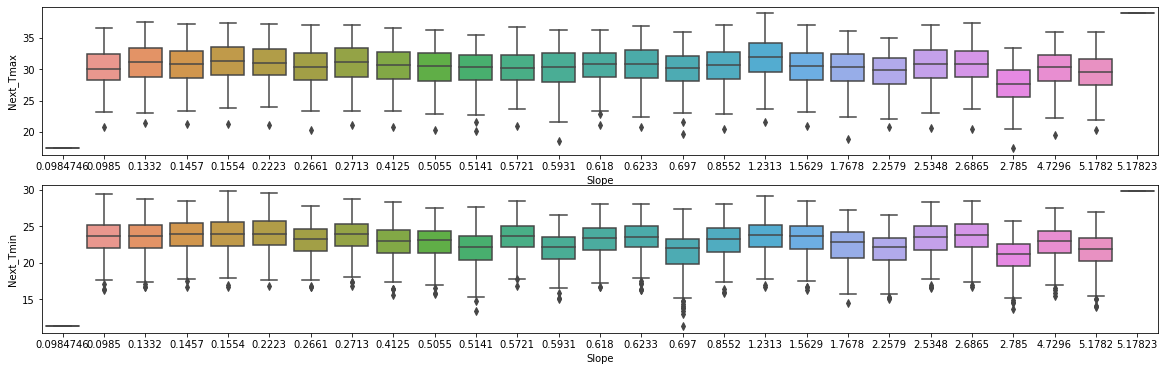

In [600]:
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.boxplot(x='Slope',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.boxplot(x='Slope',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

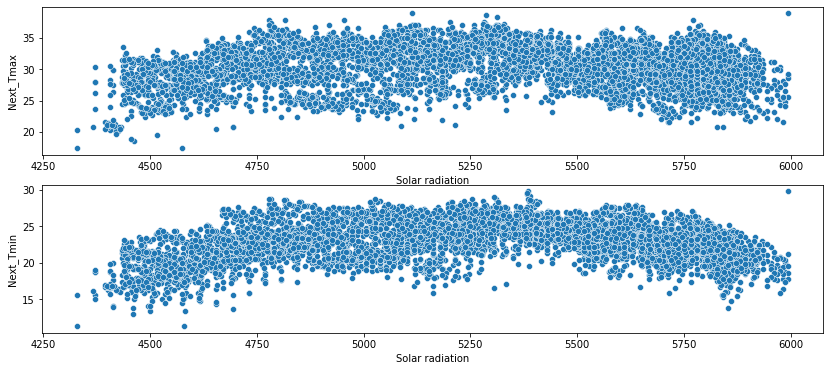

In [601]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.scatterplot(x='Solar radiation',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.scatterplot(x='Solar radiation',y='Next_Tmin',data=data)

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmin'>

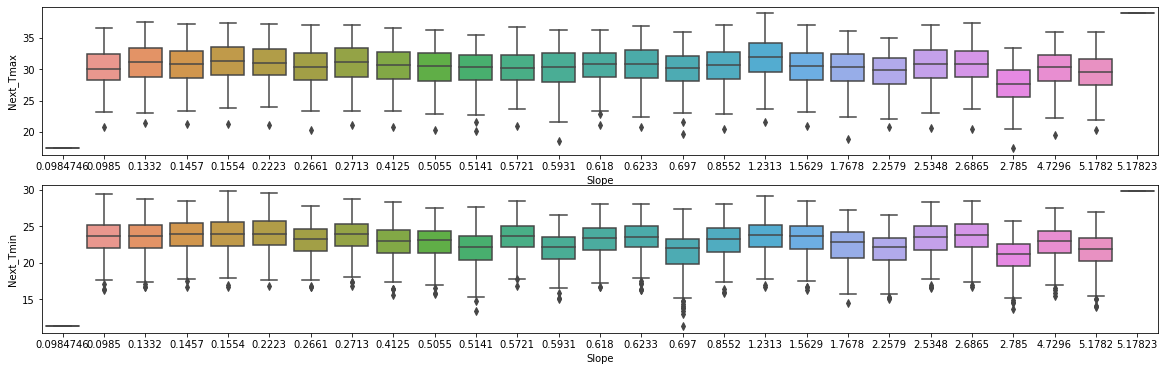

In [602]:
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.boxplot(x='Slope',y='Next_Tmax',data=data)
plt.subplot(2,1,2)
sns.boxplot(x='Slope',y='Next_Tmin',data=data)

# EDA_MULTIVARIATE ANALYSIS

<AxesSubplot:>

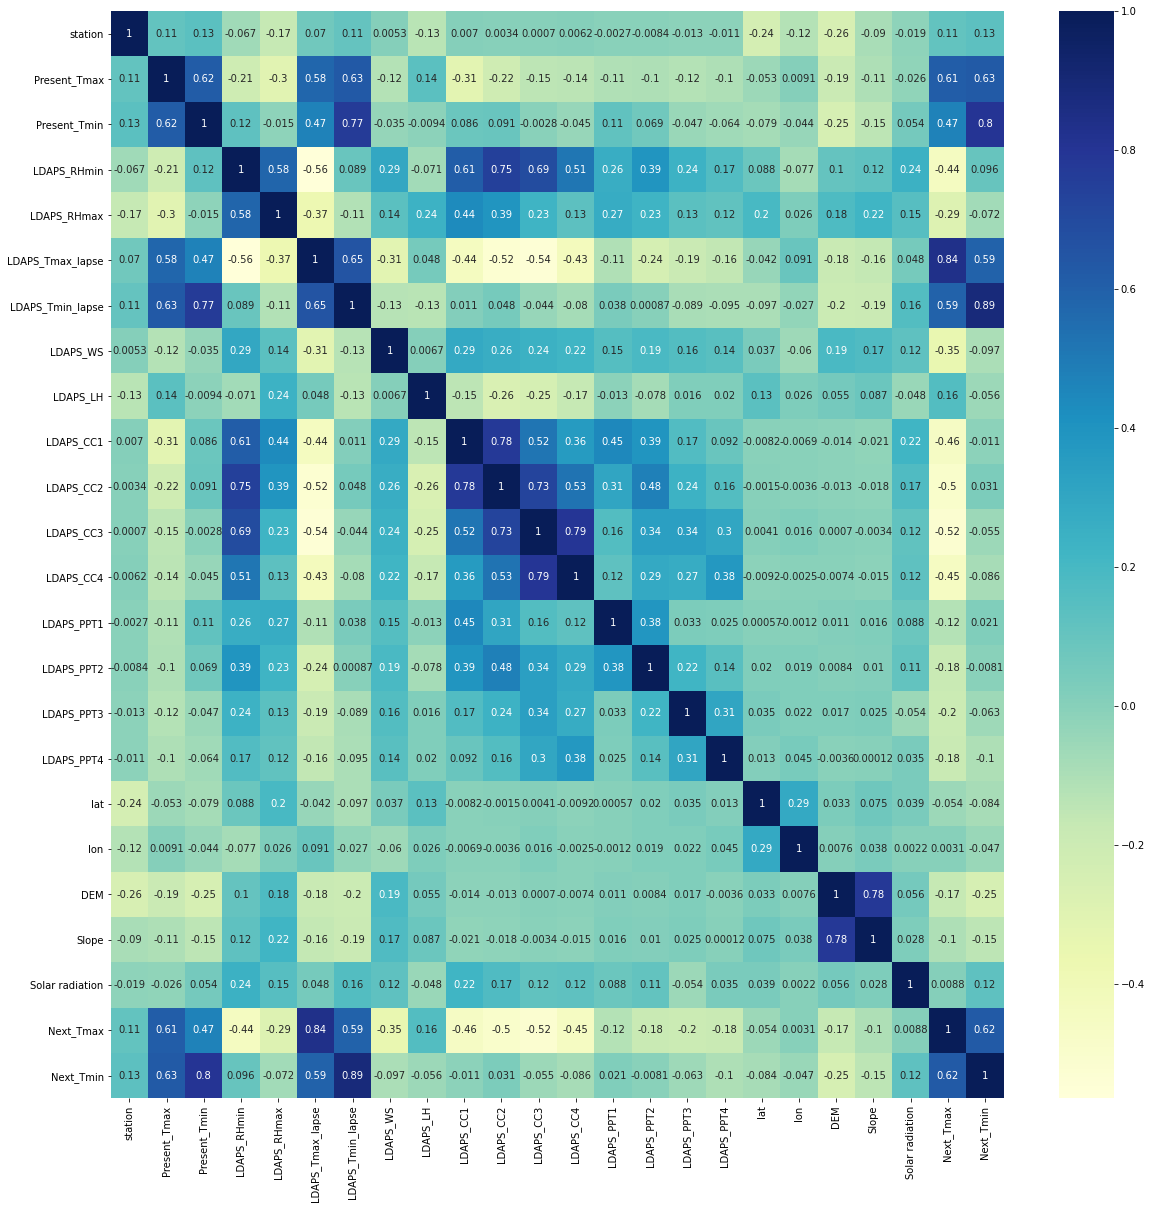

In [603]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

# Feature Engineering: Handling missing values

In [604]:
print(data.isnull().sum())
print(data.info())

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-nul

Observations:
    1. Except feature lat,lon,DEM,Slope  every feature contains missing values
    2. station fetaure will be fixed with the mean as this featur is not skewed
    3. Date feature will be fixed with mode as its a date feature
    4. all other features will be fixed with the median

In [605]:
#replacing null values with the imputation techniques for independent features

data['station']=data['station'].replace(np.NaN,data['station'].mean())
data['Date']=data['Date'].replace(np.NaN,data['Date'].mode()[0])
data['Present_Tmax']=data['Present_Tmax'].replace(np.NaN,data['Present_Tmax'].mean())
data['Present_Tmin']=data['Present_Tmin'].replace(np.NaN,data['Present_Tmin'].mean())
data['LDAPS_RHmin']=data['LDAPS_RHmin'].replace(np.NaN,data['LDAPS_RHmin'].mean())
data['LDAPS_RHmax']=data['LDAPS_RHmax'].replace(np.NaN,data['LDAPS_RHmax'].mean())
data['LDAPS_Tmax_lapse']=data['LDAPS_Tmax_lapse'].replace(np.NaN,data['LDAPS_Tmax_lapse'].mean())
data['LDAPS_Tmin_lapse']=data['LDAPS_Tmin_lapse'].replace(np.NaN,data['LDAPS_Tmin_lapse'].mean())
data['LDAPS_WS']=data['LDAPS_WS'].replace(np.NaN,data['LDAPS_WS'].mean())
data['LDAPS_LH']=data['LDAPS_LH'].replace(np.NaN,data['LDAPS_LH'].mean())
data['LDAPS_CC1']=data['LDAPS_CC1'].replace(np.NaN,data['LDAPS_CC1'].mean())
data['LDAPS_CC2']=data['LDAPS_CC2'].replace(np.NaN,data['LDAPS_CC2'].mean())
data['LDAPS_CC3']=data['LDAPS_CC3'].replace(np.NaN,data['LDAPS_CC3'].mean())
data['LDAPS_CC4']=data['LDAPS_CC4'].replace(np.NaN,data['LDAPS_CC4'].mean())
data['LDAPS_PPT1']=data['LDAPS_PPT1'].replace(np.NaN,data['LDAPS_PPT1'].mean())
data['LDAPS_PPT2']=data['LDAPS_PPT2'].replace(np.NaN,data['LDAPS_PPT2'].mean())
data['LDAPS_PPT3']=data['LDAPS_PPT3'].replace(np.NaN,data['LDAPS_PPT3'].mean())
data['LDAPS_PPT4']=data['LDAPS_PPT4'].replace(np.NaN,data['LDAPS_PPT4'].mean())


In [606]:
#droping data points which re having null values in taarget variable

print('shape before dropping',data.shape)

data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

print('shape after dropping',data.shape)

shape before dropping (7752, 25)
shape after dropping (7725, 25)


Now the missing values are handled for all the features

# Feature Engineering: Outliers handling

station                AxesSubplot(0.125,0.657941;0.065678x0.222059)
Present_Tmax        AxesSubplot(0.203814,0.657941;0.065678x0.222059)
Present_Tmin        AxesSubplot(0.282627,0.657941;0.065678x0.222059)
LDAPS_RHmin         AxesSubplot(0.361441,0.657941;0.065678x0.222059)
LDAPS_RHmax         AxesSubplot(0.440254,0.657941;0.065678x0.222059)
LDAPS_Tmax_lapse    AxesSubplot(0.519068,0.657941;0.065678x0.222059)
LDAPS_Tmin_lapse    AxesSubplot(0.597881,0.657941;0.065678x0.222059)
LDAPS_WS            AxesSubplot(0.676695,0.657941;0.065678x0.222059)
LDAPS_LH            AxesSubplot(0.755508,0.657941;0.065678x0.222059)
LDAPS_CC1           AxesSubplot(0.834322,0.657941;0.065678x0.222059)
LDAPS_CC2              AxesSubplot(0.125,0.391471;0.065678x0.222059)
LDAPS_CC3           AxesSubplot(0.203814,0.391471;0.065678x0.222059)
LDAPS_CC4           AxesSubplot(0.282627,0.391471;0.065678x0.222059)
LDAPS_PPT1          AxesSubplot(0.361441,0.391471;0.065678x0.222059)
LDAPS_PPT2          AxesSubplot(0.

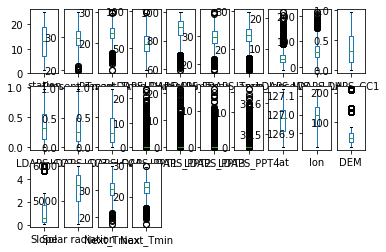

In [607]:
data.plot(kind='box',subplots=True,layout=(3,10))

In [608]:
outlier_features=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Next_Tmax','Next_Tmin']

In [609]:
def iqrfunction(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    print(feature)
    print("Q1 is: ",q1)
    print("Q3 is :",q3)
    print("IQR is ",IQR)
    lower_limit=q1-(1.5*IQR)
    higher_limit=q3+(1.5*IQR)
    print("lower range is ",lower_limit)
    print("Higher rnge is ",higher_limit)
    print('')
    data[feature]=np.where(data[feature]<lower_limit,lower_limit,data[feature])
    data[feature]=np.where(data[feature]>higher_limit,higher_limit,data[feature])

In [610]:
for i in outlier_features:
    iqrfunction(i)

Present_Tmax
Q1 is:  27.8
Q3 is : 32.0
IQR is  4.199999999999999
lower range is  21.5
Higher rnge is  38.3

Present_Tmin
Q1 is:  21.7
Q3 is : 24.9
IQR is  3.1999999999999993
lower range is  16.9
Higher rnge is  29.699999999999996

LDAPS_RHmin
Q1 is:  46.04501724
Q3 is : 66.99668121
IQR is  20.951663970000006
lower range is  14.617521284999992
Higher rnge is  98.42417716500002

LDAPS_RHmax
Q1 is:  84.29119873
Q3 is : 93.70435333
IQR is  9.413154599999999
lower range is  70.17146683000001
Higher rnge is  107.82408523000001

LDAPS_Tmax_lapse
Q1 is:  27.69618466
Q3 is : 31.6871057
IQR is  3.99092104
lower range is  21.709803100000002
Higher rnge is  37.67348726

LDAPS_Tmin_lapse
Q1 is:  22.11427721
Q3 is : 25.13530133
IQR is  3.02102412
lower range is  17.58274103
Higher rnge is  29.66683751

LDAPS_WS
Q1 is:  5.686495751
Q3 is : 7.996899088
IQR is  2.3104033370000003
lower range is  2.2208907454999993
Higher rnge is  11.462504093500002

LDAPS_LH
Q1 is:  37.45297914
Q3 is : 83.89746078
IQR 

station                AxesSubplot(0.125,0.657941;0.065678x0.222059)
Present_Tmax        AxesSubplot(0.203814,0.657941;0.065678x0.222059)
Present_Tmin        AxesSubplot(0.282627,0.657941;0.065678x0.222059)
LDAPS_RHmin         AxesSubplot(0.361441,0.657941;0.065678x0.222059)
LDAPS_RHmax         AxesSubplot(0.440254,0.657941;0.065678x0.222059)
LDAPS_Tmax_lapse    AxesSubplot(0.519068,0.657941;0.065678x0.222059)
LDAPS_Tmin_lapse    AxesSubplot(0.597881,0.657941;0.065678x0.222059)
LDAPS_WS            AxesSubplot(0.676695,0.657941;0.065678x0.222059)
LDAPS_LH            AxesSubplot(0.755508,0.657941;0.065678x0.222059)
LDAPS_CC1           AxesSubplot(0.834322,0.657941;0.065678x0.222059)
LDAPS_CC2              AxesSubplot(0.125,0.391471;0.065678x0.222059)
LDAPS_CC3           AxesSubplot(0.203814,0.391471;0.065678x0.222059)
LDAPS_CC4           AxesSubplot(0.282627,0.391471;0.065678x0.222059)
LDAPS_PPT1          AxesSubplot(0.361441,0.391471;0.065678x0.222059)
LDAPS_PPT2          AxesSubplot(0.

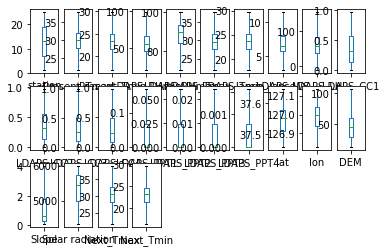

In [611]:
data.plot(kind='box',subplots=True,layout=(3,10))

now the outliers in all the independent variables are fixed

# SKENESS CORRECTION

In [612]:
data.agg(['skew','kurtosis']).transpose()

skew  kurtosis
station          -0.002773 -1.202847
Present_Tmax     -0.255472 -0.424743
Present_Tmin     -0.259463 -0.191347
LDAPS_RHmin       0.302926 -0.491052
LDAPS_RHmax      -0.734456 -0.081926
LDAPS_Tmax_lapse -0.166308 -0.234813
LDAPS_Tmin_lapse -0.411321 -0.049102
LDAPS_WS          0.808505  0.032660
LDAPS_LH          0.597240 -0.192360
LDAPS_CC1         0.460552 -0.899602
LDAPS_CC2         0.475215 -0.823735
LDAPS_CC3         0.642222 -0.601661
LDAPS_CC4         0.666281 -0.692756
LDAPS_PPT1        1.177668 -0.526889
LDAPS_PPT2        1.174894 -0.549951
LDAPS_PPT3        1.169048 -0.560919
LDAPS_PPT4        1.159465 -0.641307
lat               0.086587 -0.867534
lon              -0.286558 -0.629553
DEM               0.728551 -0.623945
Slope             1.178708  0.212580
Solar radiation  -0.513787 -0.969580
Next_Tmax        -0.301149 -0.401561
Next_Tmin        -0.302533 -0.129036

In [613]:
from sklearn.preprocessing import PowerTransformer

In [614]:
df=data.iloc[:,:-2]

In [615]:
df

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0 2013-06-30          28.7          21.4    58.255688   
1         2.0 2013-06-30          31.9          21.6    52.263397   
2         3.0 2013-06-30          31.6          23.3    48.690479   
3         4.0 2013-06-30          32.0          23.4    58.239788   
4         5.0 2013-06-30          31.4          21.9    56.174095   
...       ...        ...           ...           ...          ...   
7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749     25.0 2017-08-30          23.2          17.4    22.933014   
7750     13.0 2013-01-07          21.5          16.9    19.794666   
7751     13.0 2013-01-07          37.6          29.7    98.424177   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    70.171467         21.709803         17.582741   2.882580  -13.603212   
7751   100.000153         37.673487         29.619342  11.462504  153.564183   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      0.233947   0.203896   0.161697   0.130928    0.000000    0.000000   
1      0.225508   0.251771   0.159444   0.127727    0.000000    0.000000   
2      0.209344   0.257469   0.204091   0.142125    0.000000    0.000000   
3      0.216372   0.226002   0.161157   0.134249    0.000000    0.000000   
4      0.151407   0.249995   0.178892   0.170021    0.000000    0.000000   
...         ...        ...        ...        ...         ...         ...   
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710    0.167871    0.060087   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0       0.000000    0.000000  37.6046  126.991  106.5310  2.785000   
1       0.000000    0.000000  37.6046  127.032   44.7624  0.514100   
2       0.000000    0.000000  37.5776  127.058   33.3068  0.266100   
3       0.000000    0.000000  37.6450  127.022   45.7160  2.534800   
4       0.000000    0.000000  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751    0.024122    0.001758  37.6450  127.135  106.5310  4.012550   

      Solar radiation  
0         5992.895996  
1         5869.312500  
2         5863.555664  
3         5856.964844  
4         5859.552246  
...               ...  
7747      4443.313965  
7748      4438.373535  
7749      4451.345215  
7750      4329.520508  
7751      5992.895996  

[7725 rows x 23 columns]

In [616]:
def plots(df,feature,t):
    plt.figure(figsize=(13,5))
    plt.subplot(1,2,1)
    sns.kdeplot(df[feature])
    plt.title('Before '+str(t).split('(')[0])
    
    plt.subplot(1,2,2)
    p1=t.fit_transform(df[[feature]]).flatten()
    sns.kdeplot(p1)
    plt.title('after '+str(t).split('(')[0])

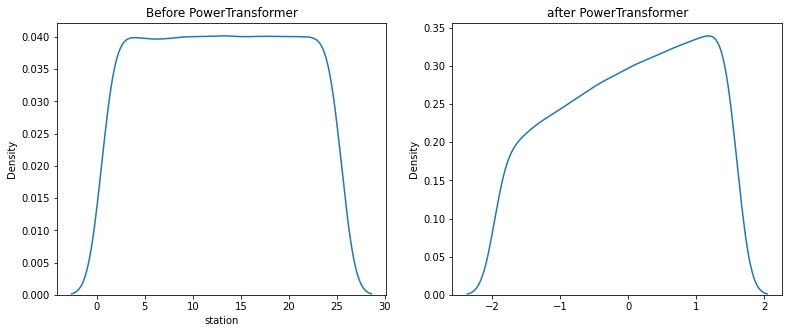

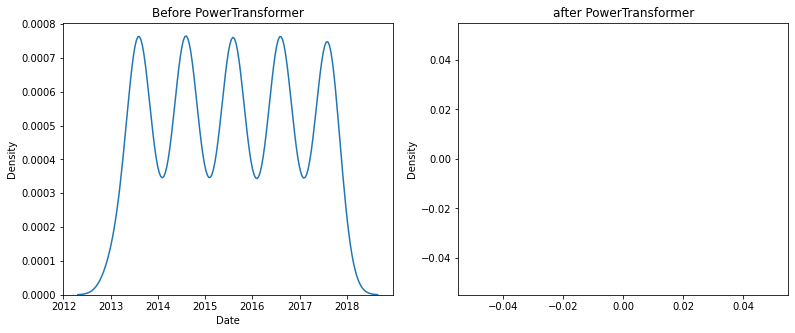

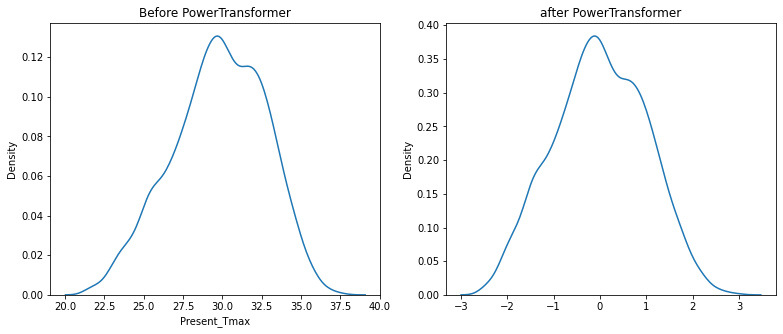

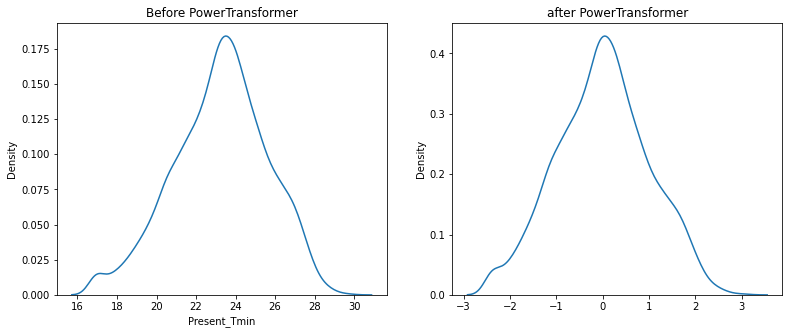

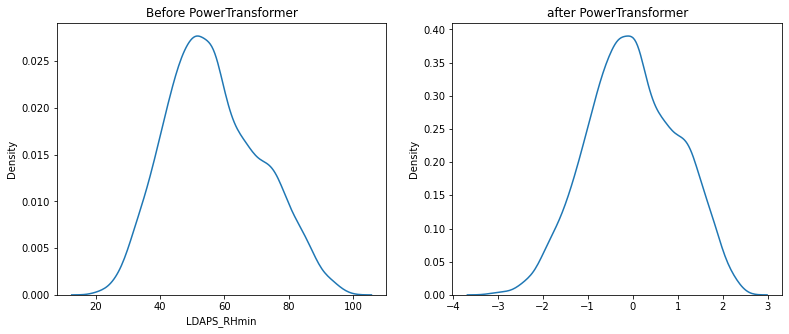

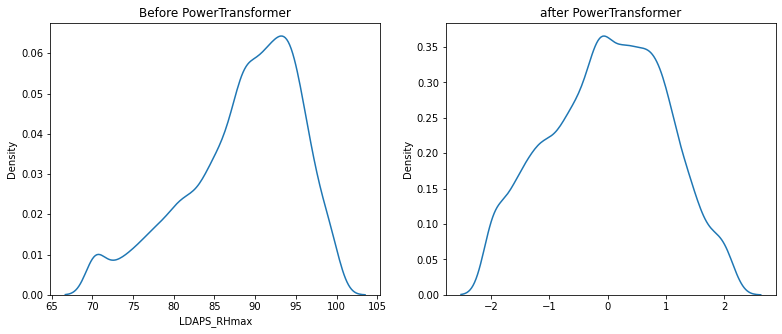

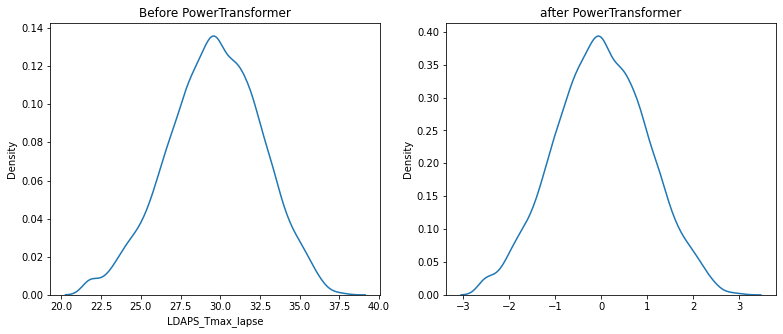

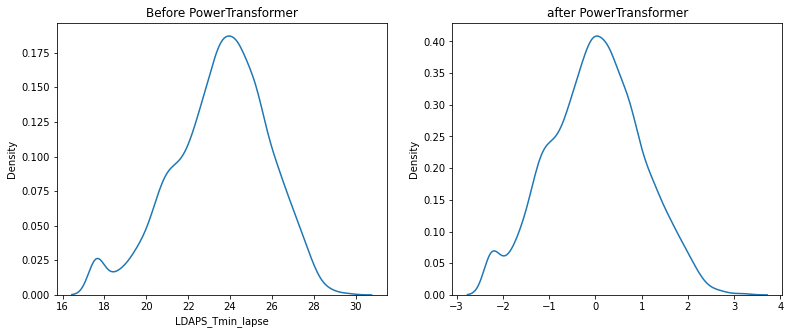

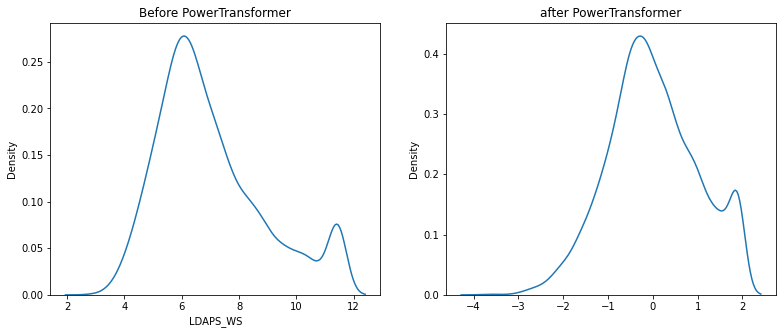

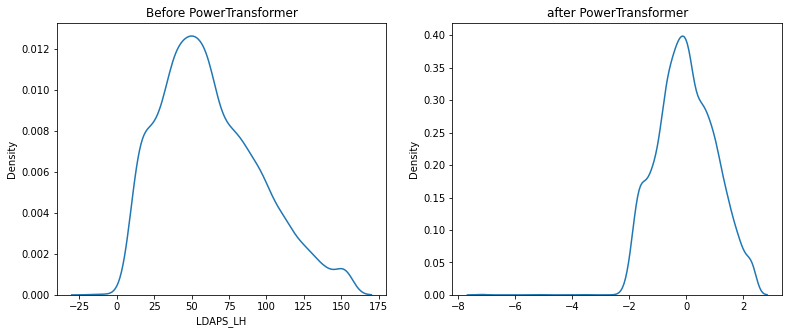

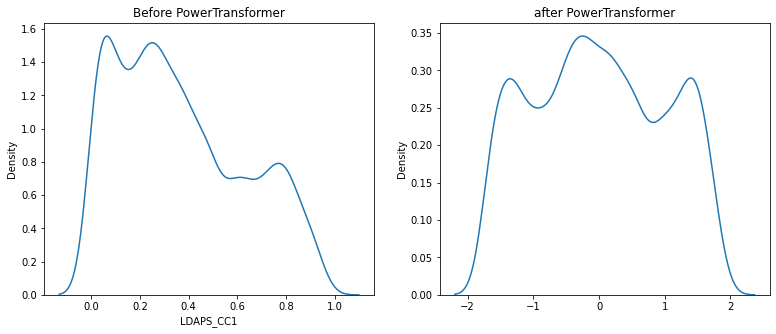

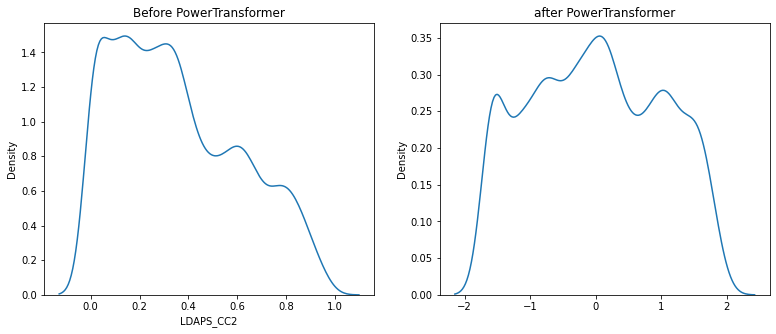

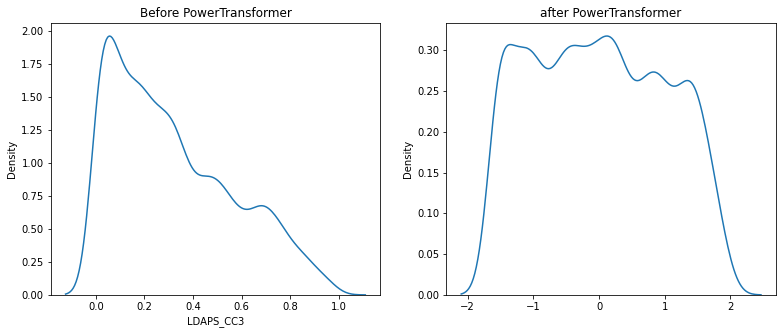

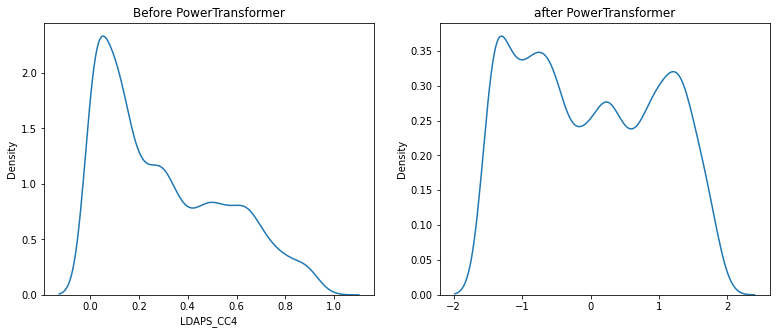

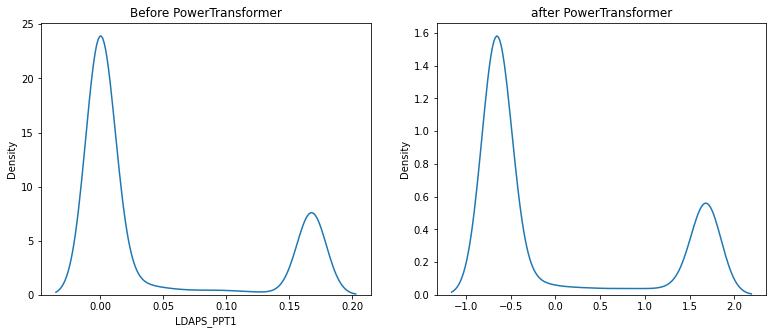

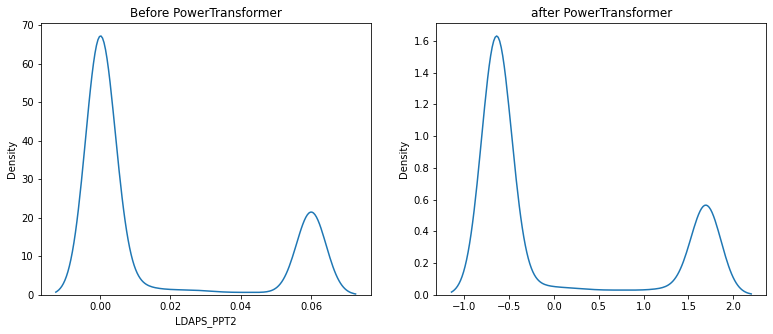

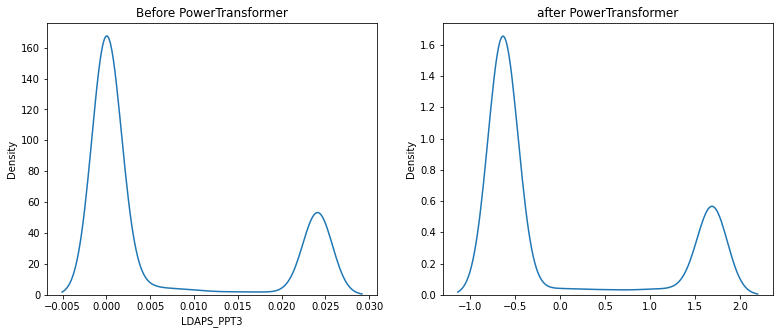

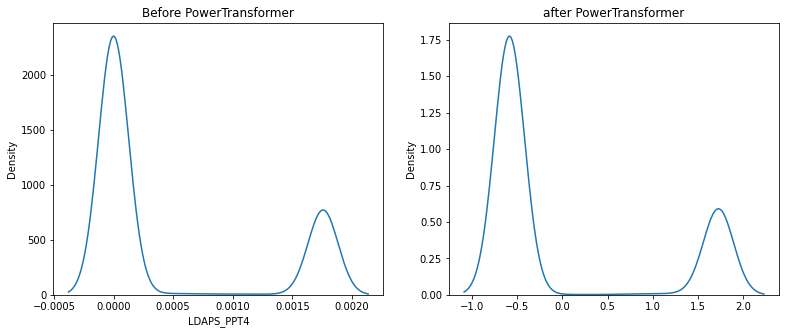

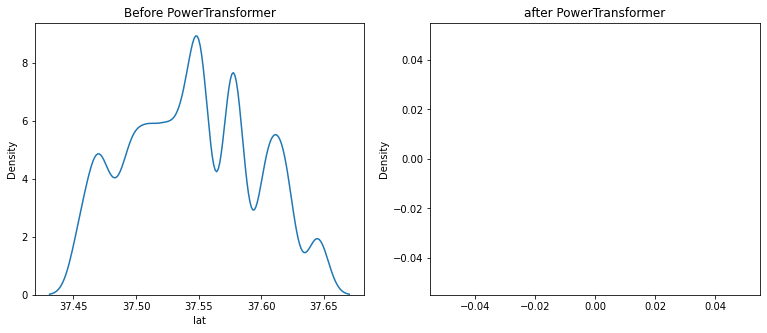

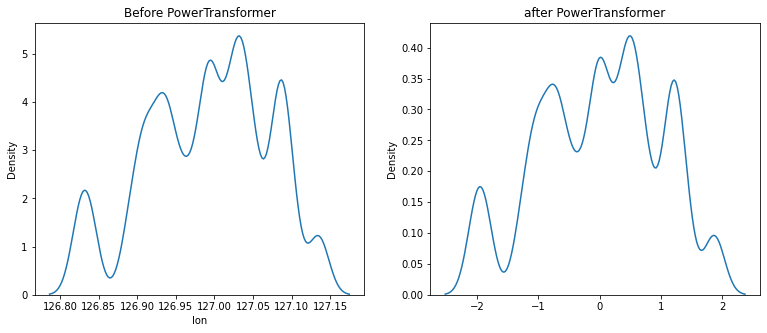

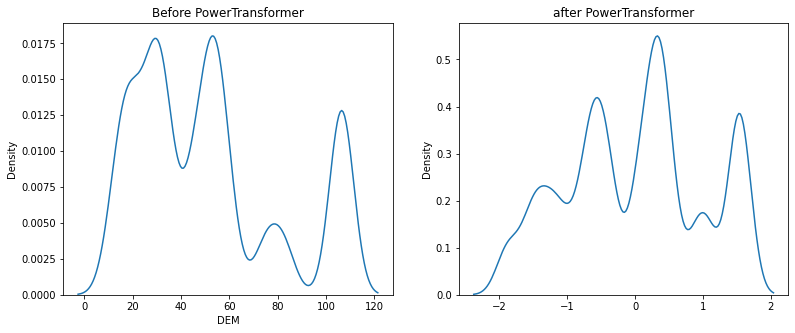

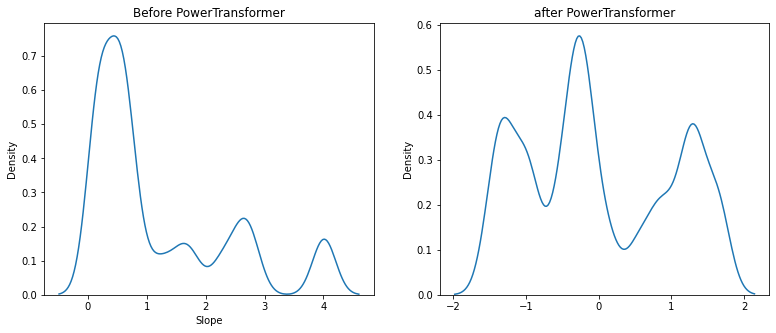

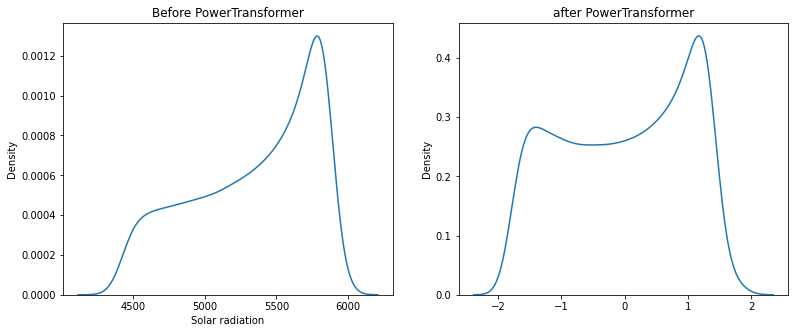

In [617]:
for i in df.columns:
    plots(df,i,PowerTransformer())

In [618]:
df.agg(['skew','kurtosis']).transpose()

skew  kurtosis
station          -0.002773 -1.202847
Present_Tmax     -0.255472 -0.424743
Present_Tmin     -0.259463 -0.191347
LDAPS_RHmin       0.302926 -0.491052
LDAPS_RHmax      -0.734456 -0.081926
LDAPS_Tmax_lapse -0.166308 -0.234813
LDAPS_Tmin_lapse -0.411321 -0.049102
LDAPS_WS          0.808505  0.032660
LDAPS_LH          0.597240 -0.192360
LDAPS_CC1         0.460552 -0.899602
LDAPS_CC2         0.475215 -0.823735
LDAPS_CC3         0.642222 -0.601661
LDAPS_CC4         0.666281 -0.692756
LDAPS_PPT1        1.177668 -0.526889
LDAPS_PPT2        1.174894 -0.549951
LDAPS_PPT3        1.169048 -0.560919
LDAPS_PPT4        1.159465 -0.641307
lat               0.086587 -0.867534
lon              -0.286558 -0.629553
DEM               0.728551 -0.623945
Slope             1.178708  0.212580
Solar radiation  -0.513787 -0.969580

since power trnsformer is not cleaning the skewness in the featurees lets perform other transformation techniques

In [619]:
data.agg(['skew','kurtosis']).transpose()

skew  kurtosis
station          -0.002773 -1.202847
Present_Tmax     -0.255472 -0.424743
Present_Tmin     -0.259463 -0.191347
LDAPS_RHmin       0.302926 -0.491052
LDAPS_RHmax      -0.734456 -0.081926
LDAPS_Tmax_lapse -0.166308 -0.234813
LDAPS_Tmin_lapse -0.411321 -0.049102
LDAPS_WS          0.808505  0.032660
LDAPS_LH          0.597240 -0.192360
LDAPS_CC1         0.460552 -0.899602
LDAPS_CC2         0.475215 -0.823735
LDAPS_CC3         0.642222 -0.601661
LDAPS_CC4         0.666281 -0.692756
LDAPS_PPT1        1.177668 -0.526889
LDAPS_PPT2        1.174894 -0.549951
LDAPS_PPT3        1.169048 -0.560919
LDAPS_PPT4        1.159465 -0.641307
lat               0.086587 -0.867534
lon              -0.286558 -0.629553
DEM               0.728551 -0.623945
Slope             1.178708  0.212580
Solar radiation  -0.513787 -0.969580
Next_Tmax        -0.301149 -0.401561
Next_Tmin        -0.302533 -0.129036

In [620]:
df1=data.copy()
df1.drop('Next_Tmax',axis=1,inplace=True)
df1.drop('Next_Tmin',axis=1,inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  
0         0.0  37.6046  126.991  106.5310  2.7850      5992.895996  
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500  
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664  
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844  
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246

In [621]:
from sklearn.preprocessing import PowerTransformer

power=PowerTransformer()
df1=pd.DataFrame(power.fit_transform(df1),columns=df1.columns)

In [622]:
df1.skew()

station            -0.205649
Present_Tmax       -0.035877
Present_Tmin       -0.021698
LDAPS_RHmin        -0.017152
LDAPS_RHmax        -0.114265
LDAPS_Tmax_lapse   -0.015759
LDAPS_Tmin_lapse   -0.027801
LDAPS_WS            0.016079
LDAPS_LH            0.041170
LDAPS_CC1           0.046895
LDAPS_CC2           0.045528
LDAPS_CC3           0.087874
LDAPS_CC4           0.126559
LDAPS_PPT1          0.989227
LDAPS_PPT2          1.022534
LDAPS_PPT3          1.018980
LDAPS_PPT4          1.131081
lat                 0.000000
lon                -0.199755
DEM                -0.021244
Slope               0.214116
Solar radiation    -0.177610
dtype: float64

In [623]:
df1['Date']=data['Date']

In [624]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df1["Date"] = lb.fit_transform(df1["Date"])

In [625]:
x=df1.copy()
y1=data.iloc[:,-1:]
y2=data.iloc[:,-2:-1]

In [626]:
y1.head()

Next_Tmin
0       21.2
1       22.5
2       23.9
3       24.3
4       22.5

Since theree aare two target variable lets predict both the target variable against the independent variable against the rest independet featurees., and depdent feature cannot be a independent feaature. hence y1 is the first target variable  and the y2 is second target variable. rest are the independent variable

# MODEL SELECTION

In [627]:
#lets find the best best random state for the best score of the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import r2_score

In [628]:
best_acc=0
best_random=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    accuracy=r2_score(y_test, pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

print("Best Accuracy score is : ",best_acc,' and Random_state is : ',i)
    

Best Accuracy score is :  0.8500096963114325  and Random_state is :  999


Next_Tmin best performance is 85% at random state 99

In [629]:
best_acc=0
best_random=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    accuracy=r2_score(y_test, pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

print("Best Accuracy score is : ",best_acc,' and Random_state is : ',i)
    

Best Accuracy score is :  0.7819782379162932  and Random_state is :  999


In [630]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y1,test_size=.30,random_state=999)
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y1,test_size=.30,random_state=999)

Next_Tmax best performance is 78% at random state 999

In [631]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train1,y_train1)

ad_pred=ad.predict(x_test1)
ad_acc=r2_score(y_test1, ad_pred)
print(ad_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test1, ad_pred))
print('Mean squared error: ', mean_squared_error(y_test1,ad_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test1,ad_pred)))

0.7979585701936514
Errors:
mean Absolute error:  0.8739646313225887
Mean squared error:  1.1737927388929585
Root mean squared error:  1.0834171582972822


In [632]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train2,y_train2)

ad_pred=ad.predict(x_test2)
ad_acc=r2_score(y_test2, ad_pred)
print(ad_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test2, ad_pred))
print('Mean squared error: ', mean_squared_error(y_test2,ad_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test2,ad_pred)))

0.7991094286463443
Errors:
mean Absolute error:  0.872373074430271
Mean squared error:  1.1671066384403959
Root mean squared error:  1.0803270978922985


In [633]:
from sklearn.ensemble import RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train1,y_train1)

RFR_pred=RFR.predict(x_test1)
RFR_acc=r2_score(y_test1, RFR_pred)
print(RFR_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test1, RFR_pred))
print('Mean squared error: ', mean_squared_error(y_test1,RFR_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test1,RFR_pred)))

0.8964073026592408
Errors:
mean Absolute error:  0.5869275237273512
Mean squared error:  0.6018387221742882
Root mean squared error:  0.775782651374912


In [634]:
from sklearn.ensemble import RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train2,y_train2)

RFR_pred=RFR.predict(x_test2)
RFR_acc=r2_score(y_test2, RFR_pred)
print(RFR_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test2, RFR_pred))
print('Mean squared error: ', mean_squared_error(y_test2,RFR_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test2,RFR_pred)))

0.8969889891868158
Errors:
mean Absolute error:  0.584605478861087
Mean squared error:  0.5984593191328733
Root mean squared error:  0.7736015247741393


In [635]:
from sklearn.model_selection import cross_val_score

In [636]:
#Y1 cross  validation score

print("Linear regression r2_score is :", cross_val_score(LR,x,y1,cv=5).mean())
print("ADA boost regressor r2_score is :", cross_val_score(ad,x,y1,cv=5).mean())
print("Random forest regressor r2_score is :", cross_val_score(RFR,x,y1,cv=5).mean())

Linear regression r2_score is : 0.7645648568798068
ADA boost regressor r2_score is : 0.7355047984224957
Random forest regressor r2_score is : 0.7453901025490551


In [637]:
#Y2 cross  validation score

print("Linear regression r2_score is :", cross_val_score(LR,x,y2,cv=5).mean())
print("ADA boost regressor r2_score is :", cross_val_score(ad,x,y2,cv=5).mean())
print("Random forest regressor r2_score is :", cross_val_score(RFR,x,y2,cv=5).mean())

Linear regression r2_score is : 0.6701798586122996
ADA boost regressor r2_score is : 0.6611720258484267
Random forest regressor r2_score is : 0.6798741416001374


# Random forest gives me the best accuracy for Y1 and Y2 target variables., lets perform hyper parameter tunning

In [638]:
from sklearn.model_selection import GridSearchCV

In [639]:
parameter={'n_estimators':np.arange(1,100),
           'criterion':['mae', 'mse'],
           'bootstrap':['bool','True']}

In [640]:
gvc=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [641]:
gvc.fit(x_train1,y_train1)

KeyboardInterrupt: 

In [ ]:
gvc.best_params_

In [646]:
gvc.fit(x_train2,y_train2)

KeyboardInterrupt: 

In [ ]:
gvc.best_params_

In [644]:
from sklearn.ensemble import RandomForestRegressor

Final_model_y1=RandomForestRegressor(n_estimators=14,criterion='mse',bootstrap='True')
Final_model_y1.fit(x_train1,y_train1)

Final_model_y1_pred=Final_model_y1.predict(x_test1)
RFR_acc=r2_score(y_test1, Final_model_y1_pred)
print(RFR_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test1, Final_model_y1_pred))
print('Mean squared error: ', mean_squared_error(y_test1,Final_model_y1_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test1,Final_model_y1_pred)))

0.8843917663621428
Errors:
mean Absolute error:  0.6177338838900531
Mean squared error:  0.6716449459421387
Root mean squared error:  0.8195394718633988


In [645]:
from sklearn.ensemble import RandomForestRegressor

Final_model_y2=RandomForestRegressor(n_estimators=14,criterion='mse',bootstrap='True')
Final_model_y2.fit(x_train1,y_train1)

Final_model_y2_pred=Final_model_y2.predict(x_test1)
RFR_acc=r2_score(y_test1, Final_model_y2_pred)
print(RFR_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test1, Final_model_y2_pred))
print('Mean squared error: ', mean_squared_error(y_test1,Final_model_y2_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test1,Final_model_y2_pred)))

0.887882073234107
Errors:
mean Absolute error:  0.6077314187107112
Mean squared error:  0.6513674371819479
Root mean squared error:  0.8070733778176231


In [649]:
import joblib

joblib.dump(Final_model_y1,'Final_model_y1.pkl')


['Final_model_y1.pkl']

In [650]:
joblib.dump(Final_model_y2,'Final_model_y2.pkl')

['Final_model_y2.pkl']